In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
img_list = glob.glob('C:/Users/John/Desktop/cv/image/test1015/*.png')
#img_list = glob.glob('C:/Users/John/Desktop/cv/image/20201120/w/*.png')

In [3]:
cnt_list = []

In [4]:
count = 0

In [5]:
new_fname = []
for i,j in enumerate(img_list):
    a = j[45:]
    new_fname.append(a.split(".")[0])
    
new_fname.sort(key=int)    

In [6]:
nlist = []
for i in new_fname:
    name = 'C:/Users/John/Desktop/cv/image/test1015/image' + i + '.png'
    nlist.append(name)

## 변화량 계산

In [7]:
for img_name in nlist:
    count += 1
    
    # Read image file in img_list
    img = cv2.imread(img_name)
    
    # Image color split and renewal
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    
    # Create a black border
    back = np.zeros((520,520,3), np.uint8)  
    back[20:500, 20:500, 0] = img[:, :, 0]
    
    img = back
    
    # Color filtering
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    lower_hsv = np.array([105, 200, 200])
    upper_hsv = np.array([360, 255, 255])
    
    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
    res = cv2.bitwise_and(img, img, mask=mask)
    
    # Image resizing
    resize_res = cv2.resize(res, dsize=(50, 50), interpolation=cv2.INTER_AREA)
    
    h, w ,c = resize_res.shape
    
    # count red pixel in res
    cnt = 0
    
    for i in range(0, h):
        for j in range(0, w):
            if resize_res[i][j][0] > 254:
                cnt+=1   
    
    cnt_list.append(cnt)
        
    if count%1000 <1:
        print(count)
    #plt.imshow(resize_res), plt.show()
print("done")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
done


### HPF

In [8]:
"""
# 데이터 처리

new = []
new.append(cnt_list[0])
temp = cnt_list[0]

for i in range(1, len(cnt_list)):
    cal = abs(cnt_list[i] - temp)
    if cal < 150: # 픽셀 차이 허용 범위
        new.append(temp)
    else:
        new.append(cnt_list[i])
        temp = cnt_list[i]
"""

'\n# 데이터 처리\n\nnew = []\nnew.append(cnt_list[0])\ntemp = cnt_list[0]\n\nfor i in range(1, len(cnt_list)):\n    cal = abs(cnt_list[i] - temp)\n    if cal < 150: # 픽셀 차이 허용 범위\n        new.append(temp)\n    else:\n        new.append(cnt_list[i])\n        temp = cnt_list[i]\n'

In [9]:
# 데이터 처리 (임계값 이상의 변화량 크기 검출)

new = []
new.append(0)
temp = cnt_list[0]

for i in range(1, len(cnt_list)):
    cal = abs(cnt_list[i] - temp)
    if cal < 120: # 픽셀 차이 허용 범위
        new.append(0)
    else:
        new.append(cal)
        temp = cnt_list[i]

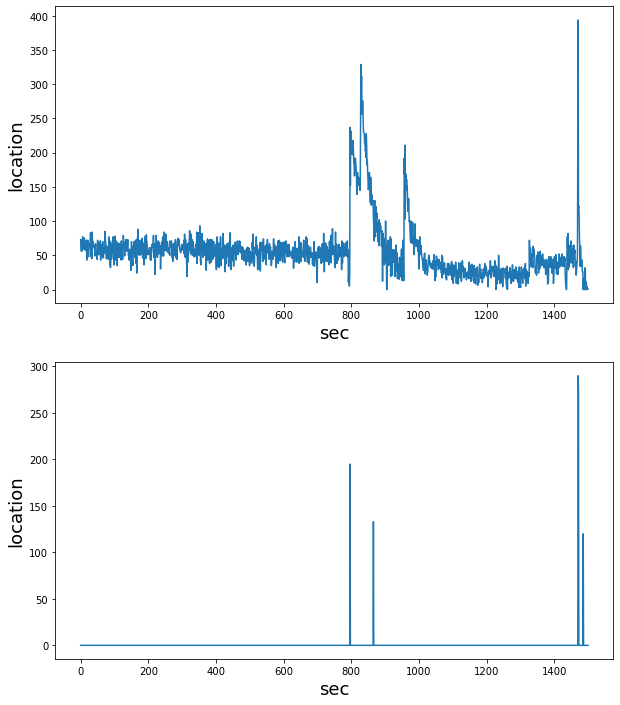

In [26]:

# check HPF filtering before & after
plt.figure(figsize=(10,12))

plt.subplot(2,1,1), plt.plot(range(1500), cnt_list[1500:3000])
plt.xlabel("sec", fontsize=18), plt.ylabel("location", fontsize=18)

plt.subplot(2,1,2), plt.plot(range(1500), new[1500:3000])
plt.xlabel("sec", fontsize=18), plt.ylabel("location", fontsize=18)

plt.show()


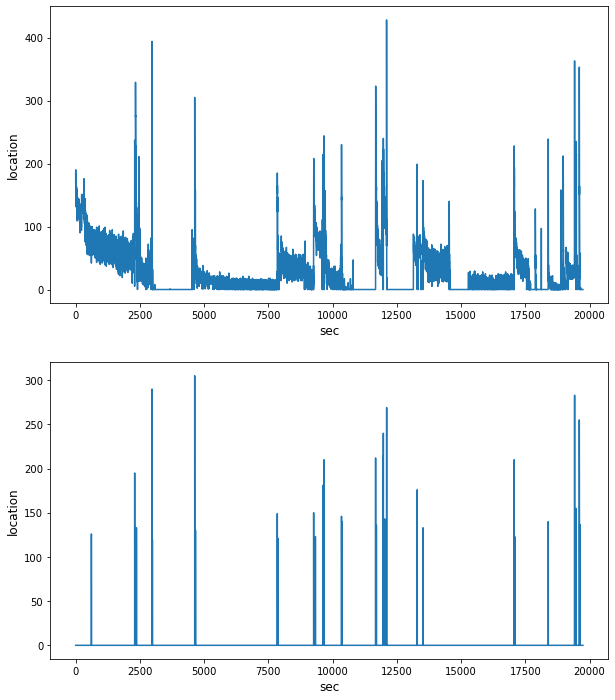

In [11]:

# check HPF filtering before & after
plt.figure(figsize=(10,12))

plt.subplot(2,1,1), plt.plot(range(len(cnt_list)), cnt_list)
plt.xlabel("sec", fontsize=12), plt.ylabel("location", fontsize=12)

plt.subplot(2,1,2), plt.plot(range(len(new)), new[:])
plt.xlabel("sec", fontsize=12), plt.ylabel("location", fontsize=12)

plt.show()


In [12]:
a = []
for i, j in enumerate(new):
    if j > 0:
        a.append((i,j))
print(a)

[(611, 126), (2296, 195), (2365, 133), (2970, 290), (2971, 274), (2985, 120), (4632, 305), (4633, 147), (4663, 130), (7846, 149), (7870, 121), (9261, 150), (9329, 123), (9619, 131), (9620, 181), (9635, 124), (9644, 123), (9667, 210), (9668, 197), (10345, 146), (10358, 140), (11672, 212), (11702, 136), (11965, 129), (11966, 214), (11971, 214), (11973, 240), (12026, 143), (12098, 248), (12102, 269), (13292, 123), (13293, 176), (13518, 133), (13521, 125), (17060, 134), (17062, 153), (17066, 210), (17088, 123), (18392, 140), (18393, 126), (19416, 250), (19417, 283), (19474, 155), (19476, 137), (19599, 255), (19603, 174), (19616, 137)]


## 시간별

In [13]:
# len(cnt_list) = 19743, 19743 / 7 = 2820 -> 시간당 2820개의 데이터
hour1 = new[0:2820]
hour2 = new[2820:5640]
hour3 = new[5640:8460]
hour4 = new[8460:11280]
hour5 = new[11280:14100]
hour6 = new[14100:16920]
hour7 = new[16920:19740]

hour1_original = cnt_list[0:2820]
hour2_original = cnt_list[2820:5640]
hour3_original = cnt_list[5640:8460]
hour4_original = cnt_list[8460:11280]
hour5_original = cnt_list[11280:14100]
hour6_original = cnt_list[14100:16920]
hour7_original = cnt_list[16920:19740]

### original data graph

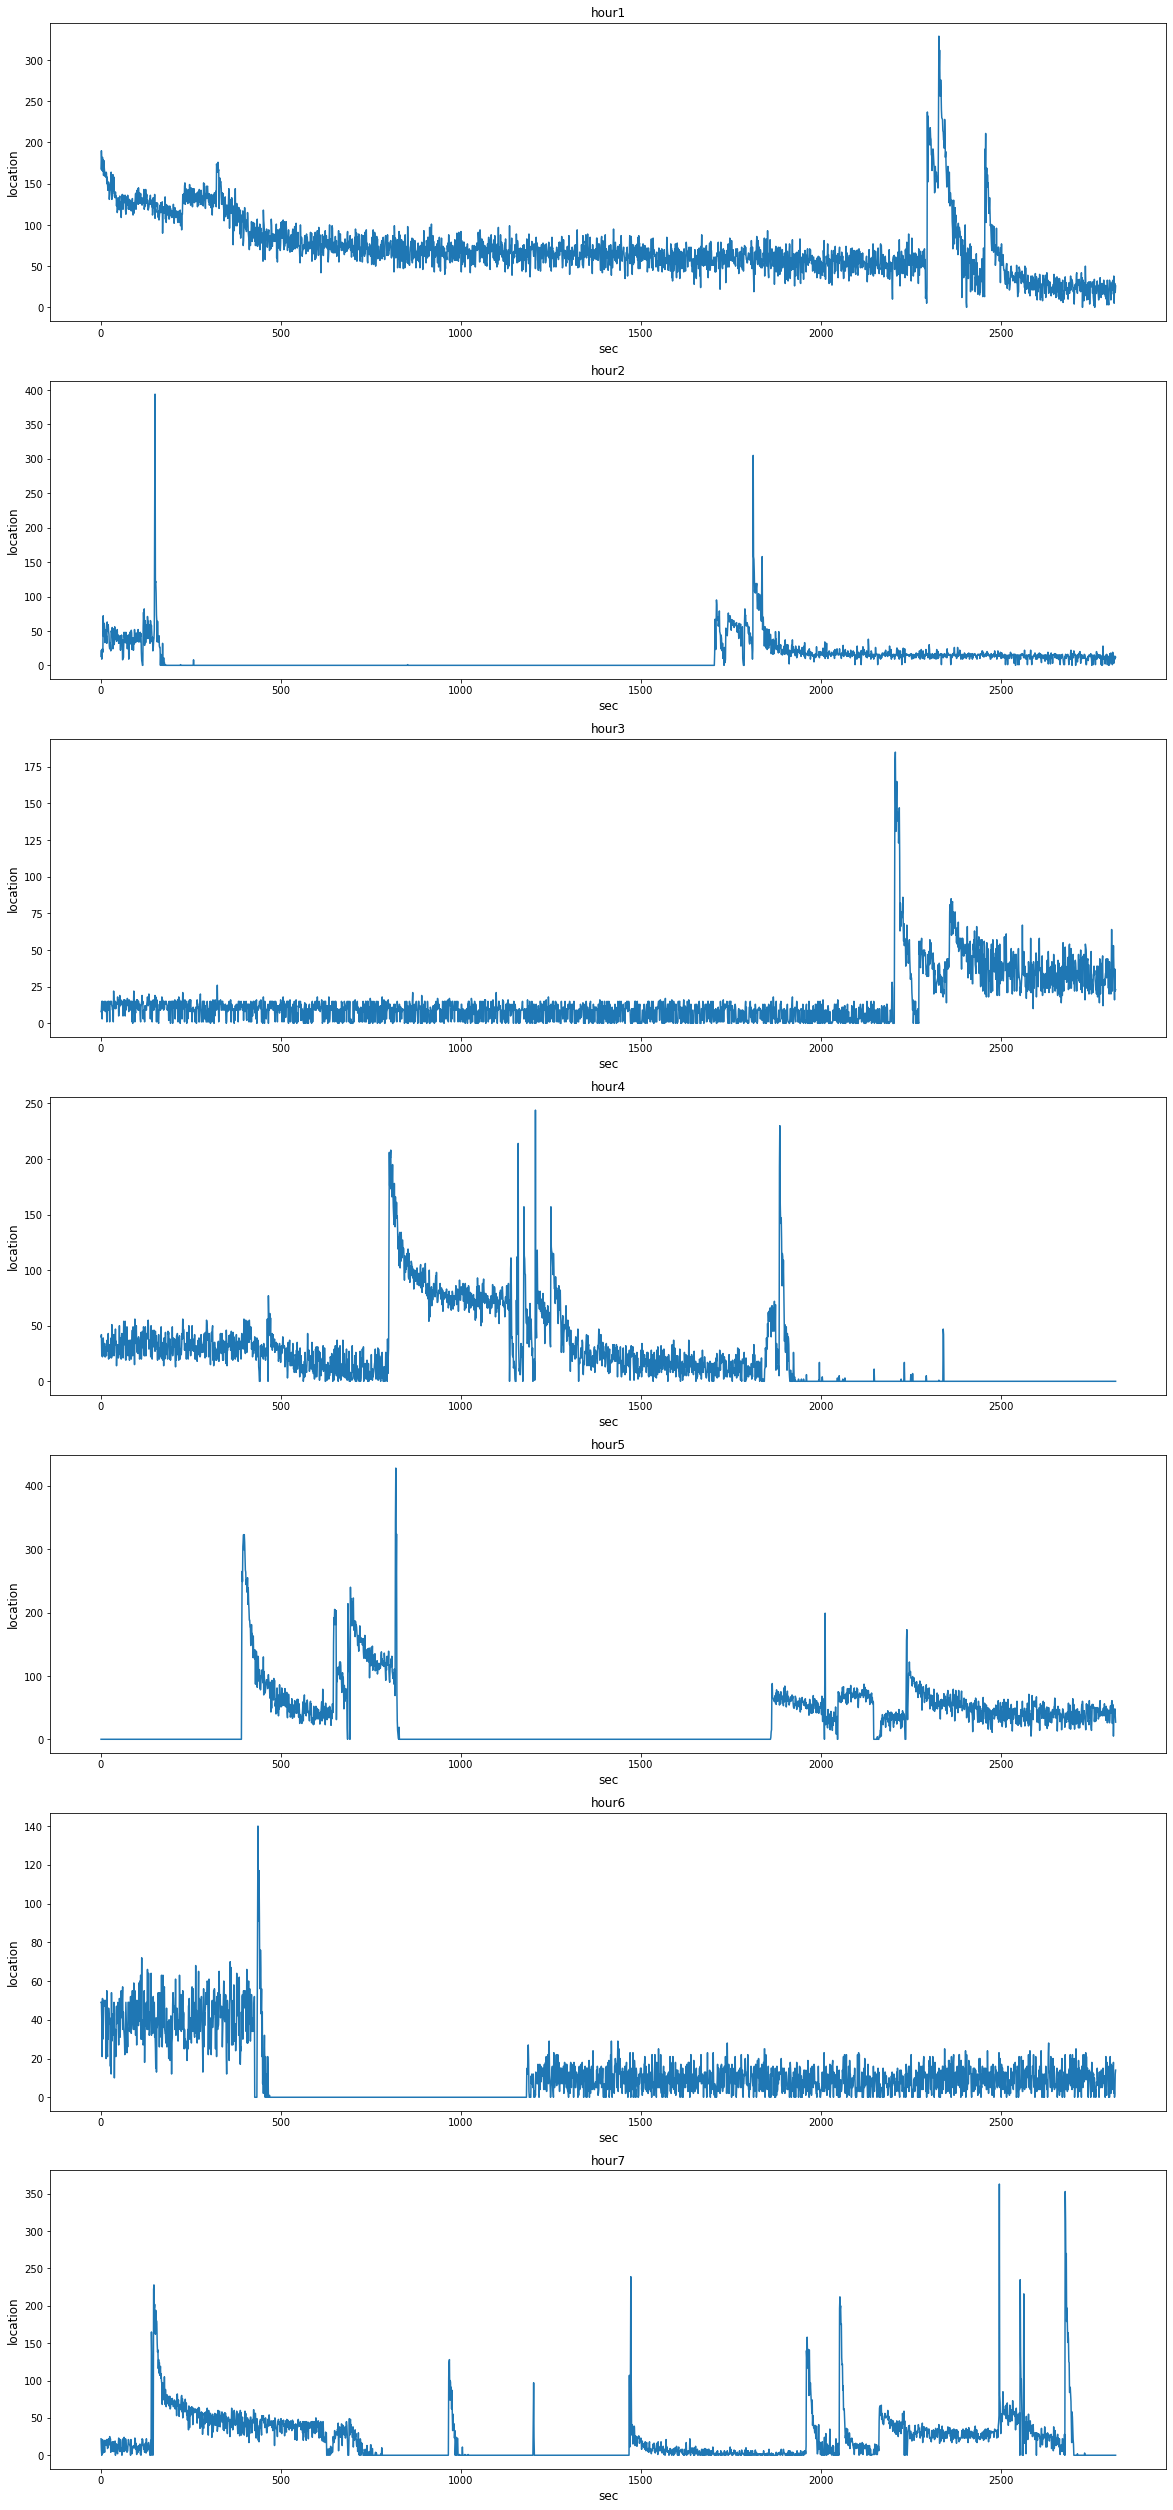

In [14]:
# 픽셀 변화량 시간대별 (원래 데이터)
        
plt.figure(figsize=(20,45))

plt.subplot(7,1,1), plt.plot(range(len(hour1_original)), hour1_original), plt.title("hour1")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,2), plt.plot(range(len(hour2_original)), hour2_original), plt.title("hour2")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,3), plt.plot(range(len(hour3_original)), hour3_original), plt.title("hour3")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,4), plt.plot(range(len(hour4_original)), hour4_original), plt.title("hour4")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,5), plt.plot(range(len(hour5_original)), hour5_original), plt.title("hour5")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,6), plt.plot(range(len(hour6_original)), hour6_original), plt.title("hour6")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,7), plt.plot(range(len(hour7_original)), hour7_original), plt.title("hour7")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.show()

### filtering data graph

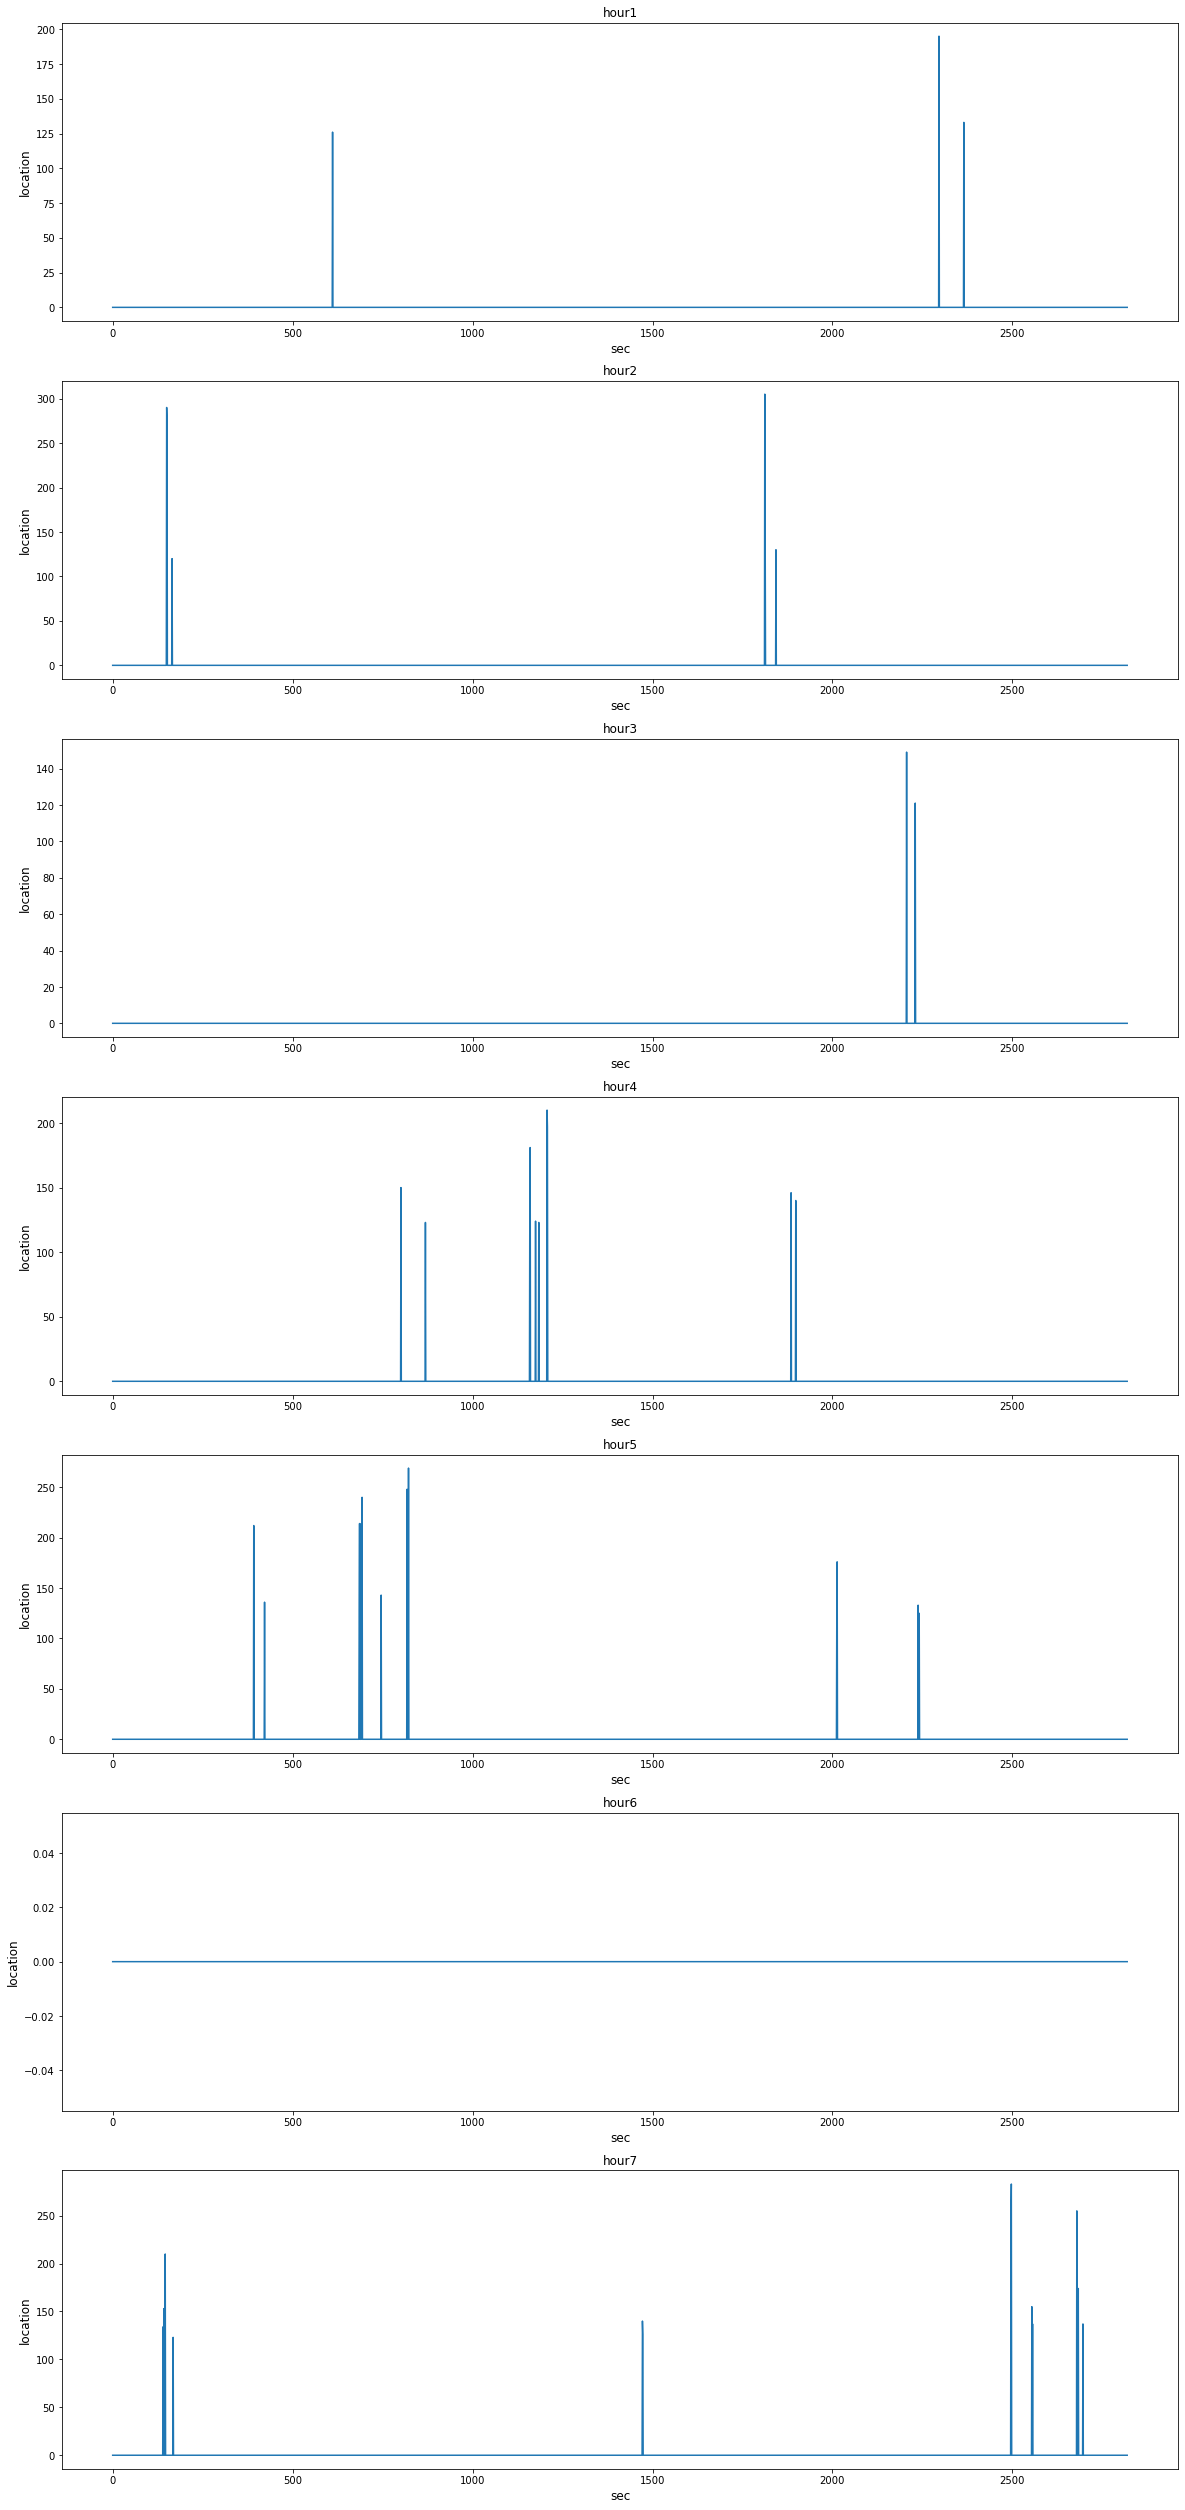

In [15]:
# 픽셀 변화량 시간대별 (처리 후 데이터)
        
plt.figure(figsize=(20,45))

plt.subplot(7,1,1), plt.plot(range(len(hour1)), hour1), plt.title("hour1")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,2), plt.plot(range(len(hour2)), hour2), plt.title("hour2")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,3), plt.plot(range(len(hour3)), hour3), plt.title("hour3")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,4), plt.plot(range(len(hour4)), hour4), plt.title("hour4")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,5), plt.plot(range(len(hour5)), hour5), plt.title("hour5")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,6), plt.plot(range(len(hour6)), hour6), plt.title("hour6")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.subplot(7,1,7), plt.plot(range(len(hour7)), hour7), plt.title("hour7")
plt.xlabel("sec", fontsize = 12), plt.ylabel("location", fontsize = 12)

plt.show()

## 90분단위

In [16]:
# len(cnt_list) = 19743, 19743 / 7 = 2820 -> 시간당 2820개의 데이터

# original data
hour1_original = cnt_list[0:5640]
hour2_original = cnt_list[5640:11280]
hour3_original = cnt_list[11280:16920]
hour4_original = cnt_list[16920:]

# filtering data
hour1 = new[0:5640] # 0 ~ 90 min
hour2 = new[5640:11280] # 90 ~ 180 min
hour3 = new[11280:16920] # 180 ~ 270 min
hour4 = new[16920:] # 270 ~ 360 min

### original data graph

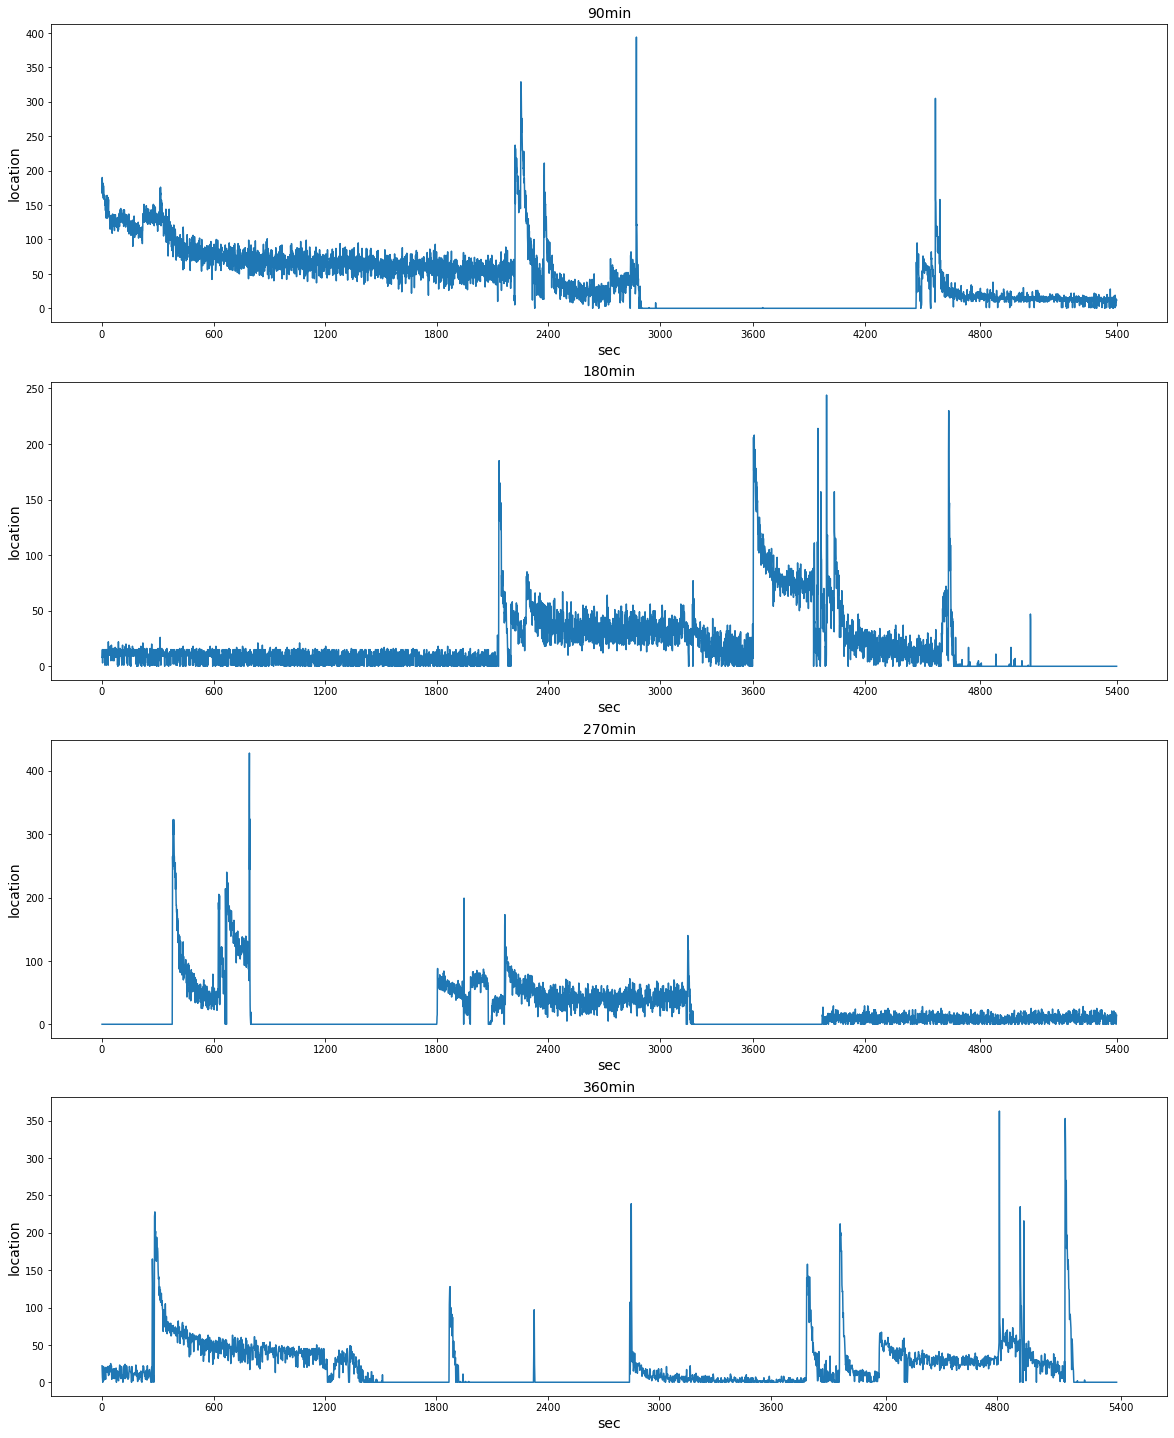

In [17]:
# 픽셀 변화량 90분단위 (원래 데이터)

plt.figure(figsize=(20,45))

ax = plt.subplot(7,1,1)
plt.plot(range(len(hour1_original)), hour1_original), plt.title("90min", fontsize = 14)
plt.xticks([0, 620, 1240, 1860, 2480, 3100, 3620, 4240, 4880, 5640])
ax.set_xticklabels([0, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400])
plt.xlabel("sec", fontsize=14), plt.ylabel("location", fontsize=14)

ax = plt.subplot(7,1,2)
plt.plot(range(len(hour2_original)), hour2_original), plt.title("180min", fontsize = 14)
plt.xticks([0, 620, 1240, 1860, 2480, 3100, 3620, 4240, 4880, 5640])
ax.set_xticklabels([0, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400])
plt.xlabel("sec", fontsize=14), plt.ylabel("location", fontsize=14)

ax = plt.subplot(7,1,3)
plt.plot(range(len(hour3_original)), hour3_original), plt.title("270min", fontsize = 14)
plt.xticks([0, 620, 1240, 1860, 2480, 3100, 3620, 4240, 4880, 5640])
ax.set_xticklabels([0, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400])
plt.xlabel("sec", fontsize=14), plt.ylabel("location", fontsize=14)

ax = plt.subplot(7,1,4)
plt.plot(range(len(hour4_original)), hour4_original), plt.title("360min", fontsize = 14)
plt.xticks([0, 310, 620, 930, 1240, 1550, 1860, 2180, 2490, 2835])
ax.set_xticklabels([0, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400])
plt.xlabel("sec", fontsize=14), plt.ylabel("location", fontsize=14)

plt.show()

### filtering data graph

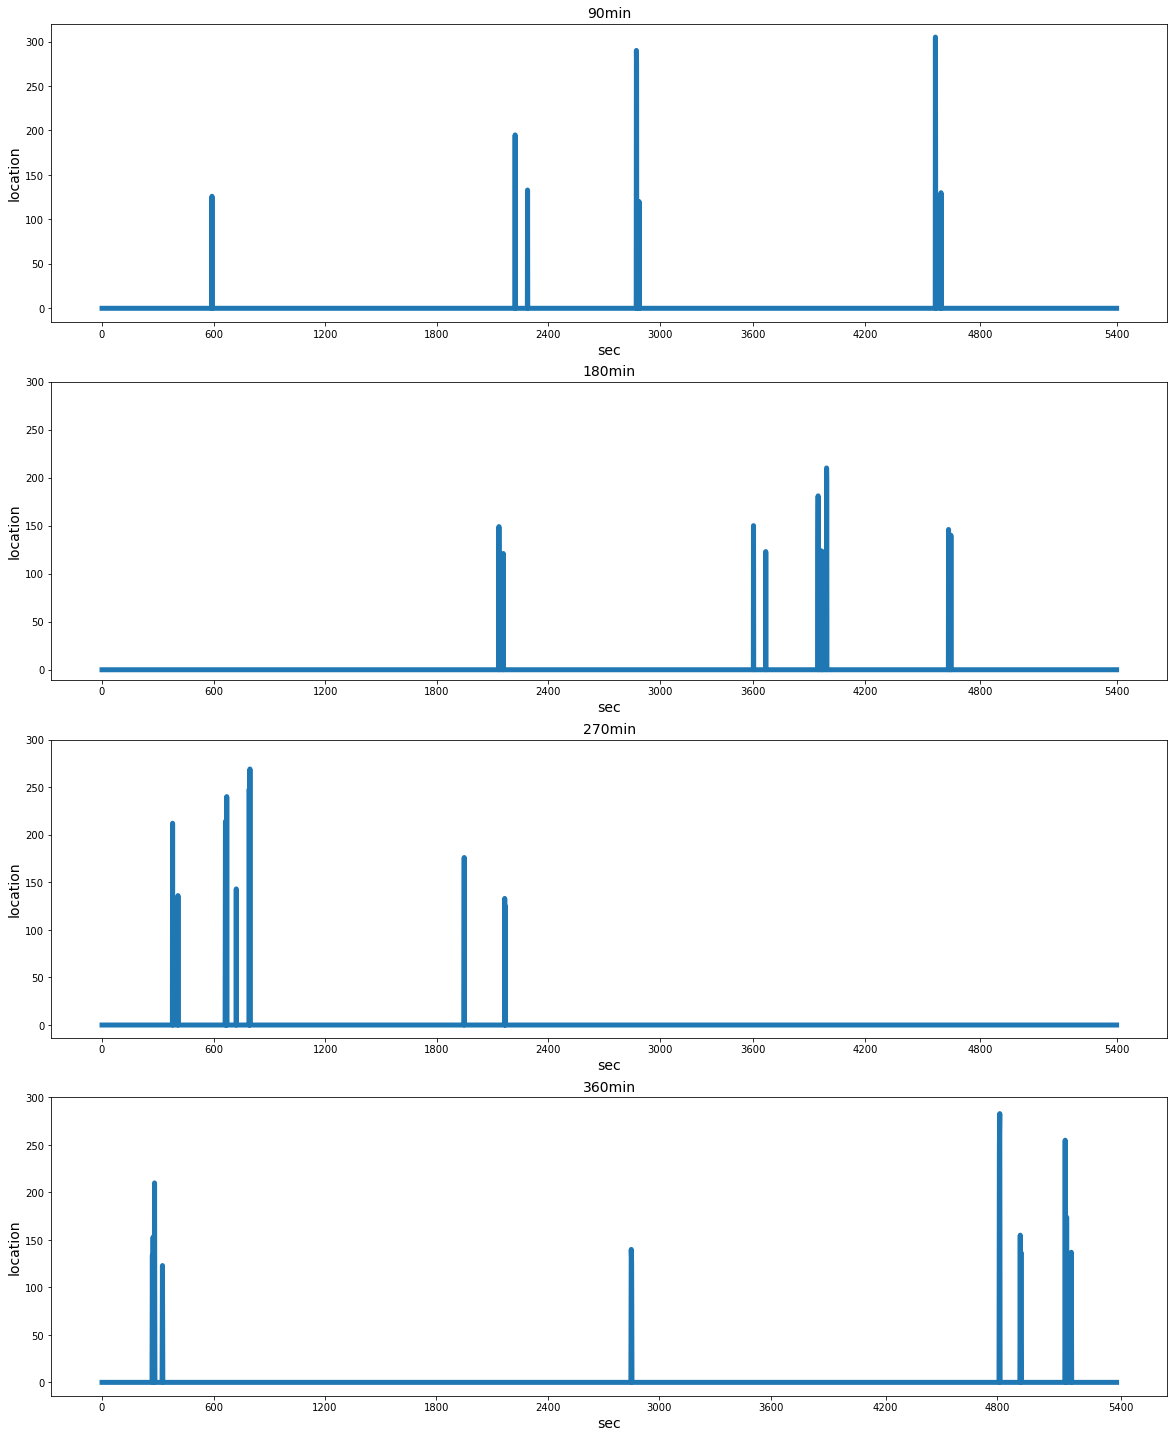

In [18]:
# 픽셀 변화량 90분단위 (필터링 데이터)

plt.figure(figsize=(20,45))

ax = plt.subplot(7,1,1)
plt.plot(range(len(hour1)), hour1, linewidth=5), plt.title("90min", fontsize = 14)
plt.xticks([0, 620, 1240, 1860, 2480, 3100, 3620, 4240, 4880, 5640])
ax.set_xticklabels([0, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400])
plt.yticks([0, 50, 100, 150, 200, 250, 300])
plt.xlabel("sec", fontsize=14), plt.ylabel("location", fontsize=14)

ax = plt.subplot(7,1,2)
plt.plot(range(len(hour2)), hour2, linewidth=5), plt.title("180min", fontsize = 14)
plt.xticks([0, 620, 1240, 1860, 2480, 3100, 3620, 4240, 4880, 5640])
ax.set_xticklabels([0, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400])
plt.yticks([0, 50, 100, 150, 200, 250, 300])

plt.xlabel("sec", fontsize=14), plt.ylabel("location", fontsize=14)

ax = plt.subplot(7,1,3)
plt.plot(range(len(hour3)), hour3, linewidth=5), plt.title("270min", fontsize = 14)
plt.xticks([0, 620, 1240, 1860, 2480, 3100, 3620, 4240, 4880, 5640])
ax.set_xticklabels([0, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400])
plt.yticks([0, 50, 100, 150, 200, 250, 300])
plt.xlabel("sec", fontsize=14), plt.ylabel("location", fontsize=14)

ax = plt.subplot(7,1,4)
plt.plot(range(len(hour4)), hour4,linewidth=5), plt.title("360min", fontsize = 14)
plt.xticks([0, 310, 620, 930, 1240, 1550, 1860, 2180, 2490, 2835])
ax.set_xticklabels([0, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400])
plt.xlabel("sec", fontsize=14), plt.ylabel("location", fontsize=14)
plt.yticks([0, 50, 100, 150, 200, 250, 300])

plt.show()

### 움직임 변화량 및 횟수 검출

In [19]:
hour1_cnt = 0
hour2_cnt = 0
hour3_cnt = 0
hour4_cnt = 0

hour1_list = []
hour2_list = []
hour3_list = []
hour4_list = []

for i in hour1:
    if i > 0:
        hour1_cnt += 1
        hour1_list.append(i)

for i in hour2:
    if i > 0:
        hour2_cnt += 1
        hour2_list.append(i)        

for i in hour3:
    if i > 0:
        hour3_cnt += 1
        hour3_list.append(i)

for i in hour4:
    if i > 0:
        hour4_cnt += 1
        hour3_list.append(i)
        
total_cnt = hour1_cnt + hour2_cnt + hour3_cnt + hour4_cnt

print("hour1_cnt =", hour1_cnt)
print("hour1_list =", hour1_list)

print("hour2_cnt =", hour2_cnt)
print("hour2_list =", hour2_list)

print("hour3_cnt =", hour3_cnt)
print("hour3_list =", hour3_list)

print("hour4_cnt =", hour4_cnt)
print("hour4_list =", hour4_list)

print("total_cnt", total_cnt)

hour1_cnt = 9
hour1_list = [126, 195, 133, 290, 274, 120, 305, 147, 130]
hour2_cnt = 12
hour2_list = [149, 121, 150, 123, 131, 181, 124, 123, 210, 197, 146, 140]
hour3_cnt = 13
hour3_list = [212, 136, 129, 214, 214, 240, 143, 248, 269, 123, 176, 133, 125, 134, 153, 210, 123, 140, 126, 250, 283, 155, 137, 255, 174, 137]
hour4_cnt = 13
hour4_list = []
total_cnt 47
